In [1]:
import numpy as np
import pandas as pd
import math
import re
import inspect
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

#CSV読み込み
df = pd.read_csv('../output/items_spots_Chinatown.csv')
# 重複行を削除
# df = df.drop_duplicates()

In [2]:
df.head(10)

,_type,budget_dinner,budget_lunch,genre,name,reviewCount,score,score_dinner,score_lunch
0,dict,"￥6,000～￥7,999","￥2,000～￥2,999",フレンチ、イタリアン、その他肉料理,\n タワーレストラン ヨコハマ\n,49,3.17,3.09,3.23
1,dict,"￥5,000～￥5,999","￥3,000～￥3,999",四川料理,\n 重慶飯店 横浜中華街 新館3F \n ...,18,3.31,3.20,3.22
2,dict,"￥4,000～￥4,999","￥2,000～￥2,999",フレンチ、カフェ、ビアガーデン,\n 山手十番館\n,16,3.37,3.06,3.52
3,dict,"￥3,000～￥3,999",～￥999,広東料理、中華料理、飲茶・点心,\n 翡翠楼 新館\n,36,3.11,3.07,3.17
4,dict,"￥5,000～￥5,999","￥2,000～￥2,999",ブラジル料理、バイキング、居酒屋,\n トラヴェソ グリル\n,68,3.56,3.55,3.24
5,dict,"￥3,000～￥3,999",null,鉄板焼き、居酒屋、お好み焼き,\n ひじてつ 元町店\n,4,3.02,3.03,-
6,dict,"￥3,000～￥3,999",～￥999,四川料理、中華料理、飲茶・点心,\n 福満園 本店\n,117,3.38,3.23,3.35
7,dict,"￥2,000～￥2,999",～￥999,四川料理、中華料理、バイキング,\n 福満園 別館\n,127,3.39,3.13,3.50
8,dict,"￥3,000～￥3,999","￥1,000～￥1,999",飲茶・点心、中華料理、四川料理,\n 王府井レストラン\n,39,3.36,3.09,3.32
9,dict,"￥1,000～￥1,999","￥1,000～￥1,999",北京料理、中華料理、飲茶・点心,\n 慶華楼\n,25,3.03,3.03,3.04


In [3]:
#列の順序を入れ替え
df = df.loc[:,['name','genre','score','score_lunch','score_dinner','reviewCount','budget_lunch','budget_dinner']]
#改行コードを削除
df = df.replace( '\n', '', regex=True)
df.head(10)

,name,genre,score,score_lunch,score_dinner,reviewCount,budget_lunch,budget_dinner
0,タワーレストラン ヨコハマ,フレンチ、イタリアン、その他肉料理,3.17,3.23,3.09,49,"￥2,000～￥2,999","￥6,000～￥7,999"
1,重慶飯店 横浜中華街 新館3F,四川料理,3.31,3.22,3.20,18,"￥3,000～￥3,999","￥5,000～￥5,999"
2,山手十番館,フレンチ、カフェ、ビアガーデン,3.37,3.52,3.06,16,"￥2,000～￥2,999","￥4,000～￥4,999"
3,翡翠楼 新館,広東料理、中華料理、飲茶・点心,3.11,3.17,3.07,36,～￥999,"￥3,000～￥3,999"
4,トラヴェソ グリル,ブラジル料理、バイキング、居酒屋,3.56,3.24,3.55,68,"￥2,000～￥2,999","￥5,000～￥5,999"
5,ひじてつ 元町店,鉄板焼き、居酒屋、お好み焼き,3.02,-,3.03,4,null,"￥3,000～￥3,999"
6,福満園 本店,四川料理、中華料理、飲茶・点心,3.38,3.35,3.23,117,～￥999,"￥3,000～￥3,999"
7,福満園 別館,四川料理、中華料理、バイキング,3.39,3.50,3.13,127,～￥999,"￥2,000～￥2,999"
8,王府井レストラン,飲茶・点心、中華料理、四川料理,3.36,3.32,3.09,39,"￥1,000～￥1,999","￥3,000～￥3,999"
9,慶華楼,北京料理、中華料理、飲茶・点心,3.03,3.04,3.03,25,"￥1,000～￥1,999","￥1,000～￥1,999"


In [4]:
# ジャンルを分ける
df_genre = pd.DataFrame(df.genre.str.split('、').tolist(), index=list(df.index)).stack()
df_genre = df_genre.reset_index()
df_genre = df_genre.rename(columns={'level_0': 'key_index', 'level_1': 'genre_index', 0: 'genre_sep'})
df_genre.head(10)

,key_index,genre_index,genre_sep
0,0,0,フレンチ
1,0,1,イタリアン
2,0,2,その他肉料理
3,1,0,四川料理
4,2,0,フレンチ
5,2,1,カフェ
6,2,2,ビアガーデン
7,3,0,広東料理
8,3,1,中華料理
9,3,2,飲茶・点心


In [5]:
# df をジャンルごとに別行に分ける
df_sepGenre = pd.merge(df, df_genre, left_index=True, right_on='key_index', how='left')
df_sepGenre = df_sepGenre.drop(['key_index','genre'],axis=1)
df_sepGenre = df_sepGenre.rename(columns={'genre_sep': 'genre'})
df_sepGenre.head(10)

,name,score,score_lunch,score_dinner,reviewCount,budget_lunch,budget_dinner,genre_index,genre
0,タワーレストラン ヨコハマ,3.17,3.23,3.09,49,"￥2,000～￥2,999","￥6,000～￥7,999",0,フレンチ
1,タワーレストラン ヨコハマ,3.17,3.23,3.09,49,"￥2,000～￥2,999","￥6,000～￥7,999",1,イタリアン
2,タワーレストラン ヨコハマ,3.17,3.23,3.09,49,"￥2,000～￥2,999","￥6,000～￥7,999",2,その他肉料理
3,重慶飯店 横浜中華街 新館3F,3.31,3.22,3.20,18,"￥3,000～￥3,999","￥5,000～￥5,999",0,四川料理
4,山手十番館,3.37,3.52,3.06,16,"￥2,000～￥2,999","￥4,000～￥4,999",0,フレンチ
5,山手十番館,3.37,3.52,3.06,16,"￥2,000～￥2,999","￥4,000～￥4,999",1,カフェ
6,山手十番館,3.37,3.52,3.06,16,"￥2,000～￥2,999","￥4,000～￥4,999",2,ビアガーデン
7,翡翠楼 新館,3.11,3.17,3.07,36,～￥999,"￥3,000～￥3,999",0,広東料理
8,翡翠楼 新館,3.11,3.17,3.07,36,～￥999,"￥3,000～￥3,999",1,中華料理
9,翡翠楼 新館,3.11,3.17,3.07,36,～￥999,"￥3,000～￥3,999",2,飲茶・点心


中華料理           190
カフェ            127
飲茶・点心          116
広東料理            86
居酒屋             78
バー              68
ダイニングバー         51
その他             44
肉まん・中華まん        43
イタリアン           37
喫茶店             36
フレンチ            35
四川料理            34
中華菓子            27
上海料理            27
焼鳥              26
ワインバー           25
餃子              24
バイキング           23
ラーメン            21
洋食              20
焼肉              17
台湾料理            17
懐石・会席料理         17
ケーキ             17
定食・食堂           16
ピザ              16
カフェ・喫茶（その他）     16
パスタ             16
中華麺（その他）        16
Name: genre, dtype: int64

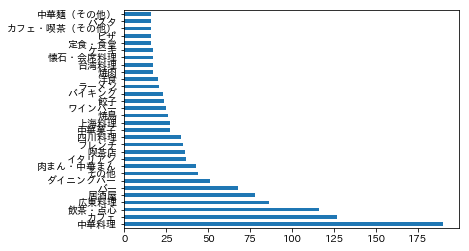

In [6]:
# どのジャンルが多いか
genre_count_top30 = df_sepGenre['genre'].value_counts().head(30)
genre_count_top30.plot.barh()
genre_count_top30

中華料理           178
飲茶・点心          108
カフェ            101
広東料理            82
肉まん・中華まん        41
四川料理            34
喫茶店             32
イタリアン           32
その他             29
居酒屋             28
上海料理            25
フレンチ            25
中華菓子            23
バイキング           22
餃子              22
ラーメン            21
ダイニングバー         18
バー              18
台湾料理            16
パスタ             16
ケーキ             16
中華麺（その他）        15
中国茶専門店          14
ピザ              14
カフェ・喫茶（その他）     14
洋食              14
コーヒー専門店         13
懐石・会席料理         13
パン              12
定食・食堂           11
Name: genre, dtype: int64

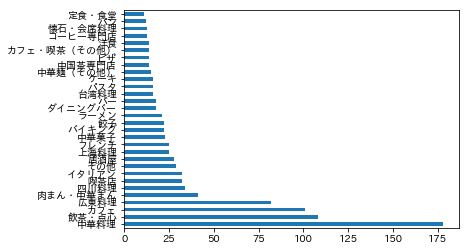

In [7]:
# ランチのみ
df_sepGenre_lunchOnly = df_sepGenre[df_sepGenre.budget_lunch != 'null']
lunch_genre_count_top30 = df_sepGenre_lunchOnly['genre'].value_counts().head(30)
lunch_genre_count_top30.plot.barh()
lunch_genre_count_top30

### 結果
料理のジャンルとしては、多い順に
1. 中華料理 178
2. イタリアン　32
3. フレンチ　25

中華料理の中だと
1. 広東料理　82
2. 四川料理　34
3. 上海料理　25
4. 台湾料理　16
---

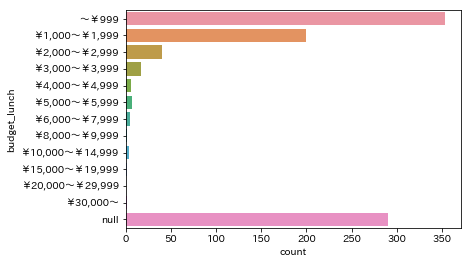

In [8]:
# ランチの価格帯を調べる
order_budget = [' ～￥999',
                '￥1,000～￥1,999',
                '￥2,000～￥2,999',
                '￥3,000～￥3,999',
                '￥4,000～￥4,999',   
                '￥5,000～￥5,999',
                '￥6,000～￥7,999',
                '￥8,000～￥9,999',
                '￥10,000～￥14,999',
                '￥15,000～￥19,999',
                '￥20,000～￥29,999',
                '￥30,000～',
                'null']
sns.countplot(y='budget_lunch', data=df, order=order_budget)

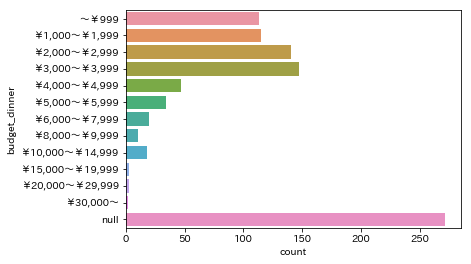

In [9]:
# ディナーの価格帯を調べる
sns.countplot(y='budget_dinner', data=df, order=order_budget)